# EDA Airbnb Euskadi - Andrés Rojo & Alberto López

<br>
<center><img src="Imágenes\airbnb_fotos_euskadi.PNG"></center>
<br>

## 1. Cargamos librerías

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import plotly.express as px
import plotly as pt
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster
from collections import Counter

<hr color="red">

## 2. Empezamos a leer el dataset en csv

### 2.1 Leemos dataframe 'listings2.csv'

In [73]:
listing = pd.read_csv('listings2.csv')
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### 2.2 Vemos el tipo de datos que componen el dataframe

In [74]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6424 non-null   int64  
 1   listing_url                                   6424 non-null   object 
 2   scrape_id                                     6424 non-null   int64  
 3   last_scraped                                  6424 non-null   object 
 4   source                                        6424 non-null   object 
 5   name                                          6424 non-null   object 
 6   description                                   6164 non-null   object 
 7   neighborhood_overview                         3340 non-null   object 
 8   picture_url                                   6423 non-null   object 
 9   host_id                                       6424 non-null   i

### 2.3 Creamos lista de variables

In [75]:
variables = ["id", "name", "host_id", "host_name", "host_response_rate", "host_is_superhost", "host_total_listings_count", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "latitude", "longitude", "property_type", "accommodates", "bathrooms", "bedrooms", "amenities", "price", "minimum_nights", "availability_365", "number_of_reviews", "review_scores_rating", "reviews_per_month", "review_scores_location", 'review_scores_cleanliness','review_scores_value','review_scores_communication','review_scores_checkin', 'review_scores_accuracy','room_type'] 
listing = listing[variables]
variables

['id',
 'name',
 'host_id',
 'host_name',
 'host_response_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'amenities',
 'price',
 'minimum_nights',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'reviews_per_month',
 'review_scores_location',
 'review_scores_cleanliness',
 'review_scores_value',
 'review_scores_communication',
 'review_scores_checkin',
 'review_scores_accuracy',
 'room_type']

### 2.4 Comprobamos valores NaN

In [76]:
listing.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
host_response_rate              654
host_is_superhost                 8
host_total_listings_count         0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
accommodates                      0
bathrooms                       173
bedrooms                         28
amenities                         0
price                           160
minimum_nights                    0
availability_365                  0
number_of_reviews                 0
review_scores_rating            923
reviews_per_month               925
review_scores_location          939
review_scores_cleanliness       939
review_scores_value             939
review_scores_communication     939
review_scores_checkin           939
review_scores_accuracy      

<Axes: >

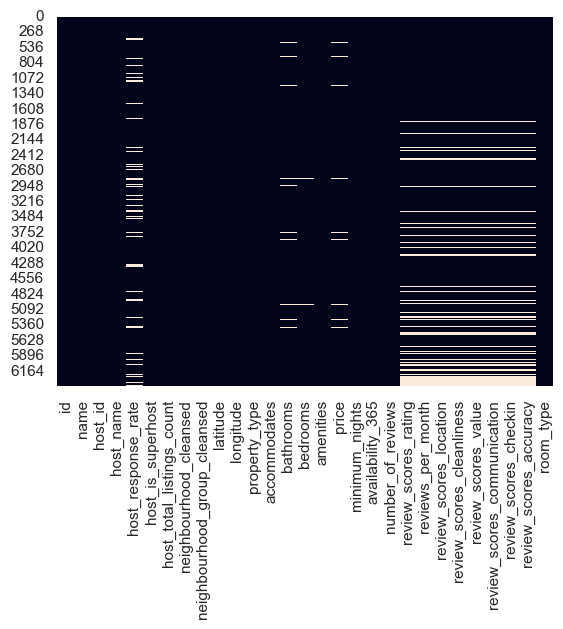

In [77]:
# Graficamos valores nulos
sns.heatmap(listing.isnull(), cbar=False)

### 2.5 Eliminamos tres columnas

In [78]:
listing.drop(['host_response_rate','review_scores_rating','reviews_per_month'], axis=1, inplace=True)
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            6424 non-null   int64  
 1   name                          6424 non-null   object 
 2   host_id                       6424 non-null   int64  
 3   host_name                     6424 non-null   object 
 4   host_is_superhost             6416 non-null   object 
 5   host_total_listings_count     6424 non-null   int64  
 6   neighbourhood_cleansed        6424 non-null   object 
 7   neighbourhood_group_cleansed  6424 non-null   object 
 8   latitude                      6424 non-null   float64
 9   longitude                     6424 non-null   float64
 10  property_type                 6424 non-null   object 
 11  accommodates                  6424 non-null   int64  
 12  bathrooms                     6251 non-null   float64
 13  bed

In [64]:
# Utilizamos la funcion para eliminar valores nulos
def quitar_nulos (df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

listing = quitar_nulos (listing)

In [80]:
listing['bathrooms']= listing['bathrooms'].median()
listing['bedrooms']= listing['bedrooms'].median()
listing['price'] = listing['price'].replace({'\$': '', ',': ''}, regex=True)


In [83]:
listing.price

0       176.0
1       150.0
2       225.0
3       180.0
4       246.0
        ...  
6419    200.0
6420    400.0
6421    154.0
6422    103.0
6423    100.0
Name: price, Length: 6424, dtype: float64

In [82]:
listing['price']=listing['price'].astype(float)
precio_medio = listing['price'].mean()
listing['price'].round(2)
listing['price'].fillna(precio_medio, inplace=True)

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/948695186.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['price'].fillna(precio_medio, inplace=True)


### 2.7 Cambiamos nombre de las columnas para que sean más legibles

In [84]:
listing.rename({'name': 'Descripción','host_name':'Anfitrión','host_is_superhost': 'Superhost','host_total_listings_count':'Total_anuncios','neighbourhood_cleansed':'Localidades','neighbourhood_group_cleansed':'Zonas','latitude':'Latitud','longitude':'Longitud','property_type':'Tipo_propiedad','accommodates':'Total_huespedes','bathrooms':'Total_baños','bedrooms':'Total_dormitorios','amenities':'Servicios','price':'Precio','minimum_nights':'Mínima_estancia','availability_365':'Disponibilidad_anual','number_of_reviews':'Total_reseñas'}, axis=1, inplace=True)

In [85]:
listing.head()

,id,Descripción,host_id,Anfitrión,Superhost,Total_anuncios,Localidades,Zonas,Latitud,Longitud,...,Mínima_estancia,Disponibilidad_anual,Total_reseñas,review_scores_location,review_scores_cleanliness,review_scores_value,review_scores_communication,review_scores_checkin,review_scores_accuracy,room_type
0,132068,Great attic+terrace+parking. Beach views. ESS0...,648938,Mikel,f,1,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.32475,-1.97335,...,2,210,709,4.94,4.76,4.75,4.97,4.97,4.91,Entire home/apt
1,142760,Piso en la playa cerca de Gaztelugatxe,693119,Maitane,t,4,Sukarrieta,Vizcaya,43.39243,-2.69474,...,2,323,71,4.72,4.93,4.75,4.62,4.50,4.84,Entire home/apt
2,309802,Luxury w/terrace near the beach WIF,1589633,Emy,f,10,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.31580,-2.00598,...,3,254,15,5.00,4.13,4.21,4.40,4.64,4.47,Entire home/apt
3,309813,Near the beach with terrace WIFI,1589633,Emy,f,10,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.31681,-1.98611,...,7,241,13,4.75,4.85,4.67,4.62,4.67,4.69,Entire home/apt
4,309828,Modern apt with beach view WIFI.,1589633,Emy,f,10,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.31471,-1.98588,...,7,222,32,4.97,4.97,4.94,4.97,4.97,5.00,Entire home/apt


In [86]:
# Cambiamos t y f a Superhost y No Superhost para que sea mas legible
listing['Superhost']=listing['Superhost'].str.replace('t','Sí').str.replace('f', 'No')

In [87]:
listing

,id,Descripción,host_id,Anfitrión,Superhost,Total_anuncios,Localidades,Zonas,Latitud,Longitud,...,Mínima_estancia,Disponibilidad_anual,Total_reseñas,review_scores_location,review_scores_cleanliness,review_scores_value,review_scores_communication,review_scores_checkin,review_scores_accuracy,room_type
0,132068,Great attic+terrace+parking. Beach views. ESS0...,648938,Mikel,No,1,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.324750,-1.973350,...,2,210,709,4.94,4.76,4.75,4.97,4.97,4.91,Entire home/apt
1,142760,Piso en la playa cerca de Gaztelugatxe,693119,Maitane,Sí,4,Sukarrieta,Vizcaya,43.392430,-2.694740,...,2,323,71,4.72,4.93,4.75,4.62,4.50,4.84,Entire home/apt
2,309802,Luxury w/terrace near the beach WIF,1589633,Emy,No,10,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.315800,-2.005980,...,3,254,15,5.00,4.13,4.21,4.40,4.64,4.47,Entire home/apt
3,309813,Near the beach with terrace WIFI,1589633,Emy,No,10,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.316810,-1.986110,...,7,241,13,4.75,4.85,4.67,4.62,4.67,4.69,Entire home/apt
4,309828,Modern apt with beach view WIFI.,1589633,Emy,No,10,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.314710,-1.985880,...,7,222,32,4.97,4.97,4.94,4.97,4.97,5.00,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,1122495381522352420,Apto coqueto en el centro.,569419026,Elena,No,1,Donostia-San SebastiÃ¡n,GuipÃºzcoa,43.313311,-1.982642,...,6,32,0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt
6420,1122521978512948746,Ático de lujo con vistas a la Playa.,31059644,Marcos,No,1,Plentzia,Vizcaya,43.406080,-2.948217,...,14,60,0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt
6421,1122547449302609321,"Bilbao, Style and Comfort",2912413,Gianluca,Sí,24,Bilbao,Vizcaya,43.247600,-2.907690,...,1,265,0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt
6422,1122547810625097401,Casa acogedora en el campo con jacuzzi(LSS00294),181499294,Juan Carlos,No,4,Amezketa,GuipÃºzcoa,43.055418,-2.048135,...,1,258,0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt


In [88]:
listing.isnull().sum()

id                               0
Descripción                      0
host_id                          0
Anfitrión                        0
Superhost                        8
Total_anuncios                   0
Localidades                      0
Zonas                            0
Latitud                          0
Longitud                         0
Tipo_propiedad                   0
Total_huespedes                  0
Total_baños                      0
Total_dormitorios                0
Servicios                        0
Precio                           0
Mínima_estancia                  0
Disponibilidad_anual             0
Total_reseñas                    0
review_scores_location         939
review_scores_cleanliness      939
review_scores_value            939
review_scores_communication    939
review_scores_checkin          939
review_scores_accuracy         939
room_type                        0
dtype: int64

### 2.8 Cambiamos el tipo de variable a columnas

In [89]:
listing['Total_baños']=listing['Total_baños'].astype(int)
listing['Total_dormitorios']=listing['Total_dormitorios'].astype(int)

### 2.9 Corregimos errores tipográficos dentro de las columnas

In [90]:
listing['Localidades'].value_counts()

Localidades
Donostia-San SebastiÃ¡n           1680
Bilbao                            1496
Vitoria-Gasteiz                    246
Zarautz                            218
Hondarribia                        176
                                  ... 
Munitibar-Arbatzegi Gerrikaitz       1
Alkiza                               1
Bedia                                1
Belauntza                            1
Baliarrain                           1
Name: count, Length: 209, dtype: int64

In [91]:
listing['Localidades'] = listing['Localidades'].str.replace('SebastiÃ¡n', 'Sebastián').str.replace('Ãlava','Álava').str.replace('GuipÃºzcoa','Guipúzcoa').str.replace('AbadiÃ±o','Abadiño').str.replace('EreÃ±o','Ereaño').str.replace('CiÃ©rvana','Ciérvana').str.replace('MaÃ±aria','Mañaria').str.replace('OyÃ³n','Oyón').str.replace('Irun', 'Irún')

In [92]:
listing['Zonas'].value_counts()

Zonas
Vizcaya       3099
GuipÃºzcoa    2806
Ãlava         519
Name: count, dtype: int64

In [93]:
listing['Zonas'] = listing['Zonas'].str.replace('Ãlava','Álava').str.replace('GuipÃºzcoa','Guipúzcoa')

In [94]:
listing.head(15)

,id,Descripción,host_id,Anfitrión,Superhost,Total_anuncios,Localidades,Zonas,Latitud,Longitud,...,Mínima_estancia,Disponibilidad_anual,Total_reseñas,review_scores_location,review_scores_cleanliness,review_scores_value,review_scores_communication,review_scores_checkin,review_scores_accuracy,room_type
0,132068,Great attic+terrace+parking. Beach views. ESS0...,648938,Mikel,No,1,Donostia-San Sebastián,Guipúzcoa,43.324750,-1.973350,...,2,210,709,4.94,4.76,4.75,4.97,4.97,4.91,Entire home/apt
1,142760,Piso en la playa cerca de Gaztelugatxe,693119,Maitane,Sí,4,Sukarrieta,Vizcaya,43.392430,-2.694740,...,2,323,71,4.72,4.93,4.75,4.62,4.50,4.84,Entire home/apt
2,309802,Luxury w/terrace near the beach WIF,1589633,Emy,No,10,Donostia-San Sebastián,Guipúzcoa,43.315800,-2.005980,...,3,254,15,5.00,4.13,4.21,4.40,4.64,4.47,Entire home/apt
3,309813,Near the beach with terrace WIFI,1589633,Emy,No,10,Donostia-San Sebastián,Guipúzcoa,43.316810,-1.986110,...,7,241,13,4.75,4.85,4.67,4.62,4.67,4.69,Entire home/apt
4,309828,Modern apt with beach view WIFI.,1589633,Emy,No,10,Donostia-San Sebastián,Guipúzcoa,43.314710,-1.985880,...,7,222,32,4.97,4.97,4.94,4.97,4.97,5.00,Entire home/apt
5,309830,Gorgeus modern design WIFI Beach,1589633,Emy,No,10,Donostia-San Sebastián,Guipúzcoa,43.316790,-1.987940,...,3,196,91,4.86,4.69,4.59,4.85,4.93,4.79,Private room
6,337759,Precioso y espacioso piso en el centro de Vitoria,1716368,Martín,No,7,Vitoria-Gasteiz,Álava,42.845160,-2.669420,...,4,124,1,4.00,4.00,4.00,4.00,2.00,4.00,Entire home/apt
7,341691,habitación céntrica baño privado derecho a cocina,1733722,Itziar,No,2,Bilbao,Vizcaya,43.261440,-2.949050,...,3,258,44,4.84,4.79,4.79,4.86,4.86,4.74,Private room
8,376823,Elegant villa in San Sebastian area,1716909,Joxeanjel,No,1,Oiartzun,Guipúzcoa,43.296540,-1.862480,...,2,326,11,5.00,5.00,4.91,5.00,5.00,4.91,Entire home/apt
9,386301,Xuloss Apartments 1,1933529,Ainhoa,Sí,9,Donostia-San Sebastián,Guipúzcoa,43.325330,-1.971730,...,2,171,286,4.86,4.74,4.66,4.95,4.93,4.83,Entire home/apt


<hr color="white">

## 3. Primeros pasos 'Calendar'

### 3.1 Leemos el df 'Calendar.csv'

In [95]:
calendar = pd.read_csv('calendar.csv')
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132068,2024-03-31,f,$195.00,NaN,1.0,63.0
1,132068,2024-04-01,f,$195.00,NaN,1.0,63.0
2,132068,2024-04-02,f,$195.00,NaN,1.0,63.0
3,132068,2024-04-03,f,$195.00,NaN,1.0,63.0
4,132068,2024-04-04,f,$195.00,NaN,1.0,63.0
...,...,...,...,...,...,...,...
2344773,961100,2025-03-26,t,$180.00,NaN,2.0,1125.0
2344774,961100,2025-03-27,t,$180.00,NaN,2.0,1125.0
2344775,961100,2025-03-28,t,$180.00,NaN,2.0,1125.0
2344776,961100,2025-03-29,t,$180.00,NaN,2.0,1125.0


### 3.2 Cambiamos true y false

In [96]:
calendar['available'] = calendar['available'].str.replace('t','Libre').str.replace('f','Ocupado')
calendar['available'].value_counts()

available
Libre      1311619
Ocupado    1033159
Name: count, dtype: int64

### 3.3 Cambiar columna date a fecha

In [97]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [98]:
calendar['date'] = calendar['date'].dt.strftime('%d/%m/%Y')
calendar['date']

0          31/03/2024
1          01/04/2024
2          02/04/2024
3          03/04/2024
4          04/04/2024
              ...    
2344773    26/03/2025
2344774    27/03/2025
2344775    28/03/2025
2344776    29/03/2025
2344777    30/03/2025
Name: date, Length: 2344778, dtype: object

### 3.4 Vemos el tipo de datos que contiene

In [99]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344778 entries, 0 to 2344777
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 125.2+ MB


/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/3615971830.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  calendar['date'] = pd.to_datetime(calendar['date'])


### 3.5 Cambiamos la columna precio

In [101]:
calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True)
calendar['price'] = calendar['price'].astype(float)

### 3.6 Renombramos las variables para mayor legibilidad

In [102]:
calendar.drop(['adjusted_price','minimum_nights','maximum_nights'], axis=1, inplace=True)

In [103]:
calendar.rename({'date': 'Fechas','available':'Disponibilidad','price':'Precio'}, axis=1, inplace=True)
calendar

,listing_id,Fechas,Disponibilidad,Precio
0,132068,2024-03-31,Ocupado,195.0
1,132068,2024-04-01,Ocupado,195.0
2,132068,2024-04-02,Ocupado,195.0
3,132068,2024-04-03,Ocupado,195.0
4,132068,2024-04-04,Ocupado,195.0
...,...,...,...,...
2344773,961100,2025-03-26,Libre,180.0
2344774,961100,2025-03-27,Libre,180.0
2344775,961100,2025-03-28,Libre,180.0
2344776,961100,2025-03-29,Libre,180.0


### 3.7 Añadimos la columna Precio a calendar

In [104]:
# Comentamos esta línea pues solo nos sirve para generar una columna que se utilizará en PowerBi
#calendar= pd.merge(calendar, listing[['Precio']], how='left')

In [105]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344778 entries, 0 to 2344777
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   Fechas          datetime64[ns]
 2   Disponibilidad  object        
 3   Precio          float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 71.6+ MB


In [106]:
calendar.sample(15)

,listing_id,Fechas,Disponibilidad,Precio
2309760,1116152926506181888,2024-04-23,Libre,50.0
1793628,872367035694120871,2024-04-11,Libre,120.0
617439,33215510,2024-10-20,Ocupado,90.0
1507351,681732299129849396,2024-11-20,Libre,550.0
2277554,1105710514723561880,2025-01-29,Ocupado,438.0
1958946,928979151609340814,2025-03-13,Ocupado,45.0
489328,26580922,2024-10-28,Ocupado,1000.0
1751686,856978544222005335,2024-05-15,Libre,104.0
2230825,1085222519003607392,2025-01-21,Libre,120.0
302847,19279852,2024-12-15,Ocupado,75.0


### 3.8 Probando a quitar outliers con IQR (no sigue distribucion normal)

In [107]:
def reemplazar_outliers_iqr(df, columnas):
    """
    Reemplazamos los outliers del  df usando el método IQR. 
    """
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
        df[columna] = np.where(df[columna] < (Q1 - 1.5 * IQR), Q1, df[columna])
        df[columna] = np.where(df[columna] > (Q3 + 1.5 * IQR), Q3, df[columna])
        
    return df

In [108]:
columnas_a_limpiar = ['Total_reseñas']  #  poner aquí las columnas que desees limpiar
df_limpio = reemplazar_outliers_iqr(listing, columnas_a_limpiar)

In [109]:
# Testeo de quitar outliers (no funciona correctamente)
fig = px.box(listing, x='Zonas', y='Total_huespedes', 
             title='Relación entre el tamaño de la empresa y el salario', 
             category_orders={"company_size": ["S", "M", "L"]}, # Damos nosotros el orden de las variables (Pequeña,Mediana,Grande)
             template="plotly_dark", color='Zonas') # añadimos color para diferenciar mejor los tamaños de empresa

fig.show()

<hr color="green">

## 4. Primeros pasos 'Neighbourhoods'

### 4.1 Leemos el df 'neighbourhoods.csv'

In [110]:
neighbourhoods = pd.read_csv('neighbourhoods.csv')
neighbourhoods

,neighbourhood_group,neighbourhood
0,Ãlava,AÃ±ana
1,Ãlava,AlegrÃ­a-Dulantzi
2,Ãlava,Amurrio
3,Ãlava,Aramaio
4,Ãlava,ArmiÃ±Ã³n
...,...,...
250,Vizcaya,Zamudio
251,Vizcaya,Zaratamo
252,Vizcaya,Zeanuri
253,Vizcaya,Zeberio


### 4.2 Renombramos las columnas neightbourhood_group & Neightbourhood

In [111]:
neighbourhoods.rename({'neighbourhood_group': 'Zonas','neighbourhood':'Localidades'}, axis=1, inplace=True)
neighbourhoods

,Zonas,Localidades
0,Ãlava,AÃ±ana
1,Ãlava,AlegrÃ­a-Dulantzi
2,Ãlava,Amurrio
3,Ãlava,Aramaio
4,Ãlava,ArmiÃ±Ã³n
...,...,...
250,Vizcaya,Zamudio
251,Vizcaya,Zaratamo
252,Vizcaya,Zeanuri
253,Vizcaya,Zeberio


### 4.3 Remplazamos y corregimos errores tipográficos

In [112]:
neighbourhoods['Zonas'] = neighbourhoods['Zonas'].str.replace('Ãlava','Álava').str.replace('GuipÃºzcoa','Guipúzcoa')
neighbourhoods['Localidades'] = neighbourhoods['Localidades'].str.replace('SebastiÃ¡n', 'Sebastián').str.replace('Ãlava','Álava').str.replace('GuipÃºzcoa','Guipúzcoa').str.replace('AbadiÃ±o','Abadiño').str.replace('EreÃ±o','Ereaño').str.replace('CiÃ©rvana','Ciérvana').str.replace('MaÃ±aria','Mañaria').str.replace('OyÃ³n','Oyón').str.replace('IruÃ±a Oka','Iruña Oka').str.replace('LantarÃ³n','Lantarón').str.replace('ValdegovÃ­a','Valdegovía').str.replace('YÃ©cora','Yécora').str.replace('PeÃ±acerrada','Peñacerrada').str.replace('ParzonerÃ­a de Encia', 'Parzonería de encia').str.replace('MillÃ¡n', 'Millán').str.replace('OÃ±ati', 'Oñate').str.replace('GÃºeÃ±es','Güeñes').str.replace('EreÃ±o','Ereño').str.replace('MeÃ±aka','Meñaka').str.replace('AÃ±ana','Añana').str.replace('TrÃ¡paga' , 'Trápaga').str.replace('AlegrÃ­a-Dulantzi', 'Alegría-Dulantzi').str.replace('BaÃ±os','Baños').str.replace('ArmiÃ±Ã³n','Armiñón').str.replace('IruÃ±a', 'Irúña').str.replace('LaÃ±', 'Laño').str.replace('TreviÃ±o','Treviño').str.replace('PipaÃ³n','Pipaón').str.replace('LagrÃ¡n','Lagrán').str.replace('UrduÃ±a-OrduÃ±a','Urduña-Orduña').str.replace('Irun','Irún')

In [113]:
neighbourhoods['Localidades'].head(20)

0                                                 Añana
1                                      Alegría-Dulantzi
2                                               Amurrio
3                                               Aramaio
4                                               Armiñón
5                                         Arraia-Maeztu
6                                    Arrazua-Ubarrundia
7                                            Artziniega
8                                             Asparrena
9                                                 Ayala
10                                        Baños de Ebro
11                                            Barrundia
12                                         Berantevilla
13                                              Bernedo
14    Comunidad de Cuartango, Irúña de Oca y Ribera ...
15    Comunidad de Lañoo (Condado de Treviño), Pipaó...
16                                              Elburgo
17                                              

In [114]:
neighbourhoods

,Zonas,Localidades
0,Álava,Añana
1,Álava,Alegría-Dulantzi
2,Álava,Amurrio
3,Álava,Aramaio
4,Álava,Armiñón
...,...,...
250,Vizcaya,Zamudio
251,Vizcaya,Zaratamo
252,Vizcaya,Zeanuri
253,Vizcaya,Zeberio


In [115]:
listing

,id,Descripción,host_id,Anfitrión,Superhost,Total_anuncios,Localidades,Zonas,Latitud,Longitud,...,Mínima_estancia,Disponibilidad_anual,Total_reseñas,review_scores_location,review_scores_cleanliness,review_scores_value,review_scores_communication,review_scores_checkin,review_scores_accuracy,room_type
0,132068,Great attic+terrace+parking. Beach views. ESS0...,648938,Mikel,No,1,Donostia-San Sebastián,Guipúzcoa,43.324750,-1.973350,...,2,210,52.0,4.94,4.76,4.75,4.97,4.97,4.91,Entire home/apt
1,142760,Piso en la playa cerca de Gaztelugatxe,693119,Maitane,Sí,4,Sukarrieta,Vizcaya,43.392430,-2.694740,...,2,323,71.0,4.72,4.93,4.75,4.62,4.50,4.84,Entire home/apt
2,309802,Luxury w/terrace near the beach WIF,1589633,Emy,No,10,Donostia-San Sebastián,Guipúzcoa,43.315800,-2.005980,...,3,254,15.0,5.00,4.13,4.21,4.40,4.64,4.47,Entire home/apt
3,309813,Near the beach with terrace WIFI,1589633,Emy,No,10,Donostia-San Sebastián,Guipúzcoa,43.316810,-1.986110,...,7,241,13.0,4.75,4.85,4.67,4.62,4.67,4.69,Entire home/apt
4,309828,Modern apt with beach view WIFI.,1589633,Emy,No,10,Donostia-San Sebastián,Guipúzcoa,43.314710,-1.985880,...,7,222,32.0,4.97,4.97,4.94,4.97,4.97,5.00,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,1122495381522352420,Apto coqueto en el centro.,569419026,Elena,No,1,Donostia-San Sebastián,Guipúzcoa,43.313311,-1.982642,...,6,32,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt
6420,1122521978512948746,Ático de lujo con vistas a la Playa.,31059644,Marcos,No,1,Plentzia,Vizcaya,43.406080,-2.948217,...,14,60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt
6421,1122547449302609321,"Bilbao, Style and Comfort",2912413,Gianluca,Sí,24,Bilbao,Vizcaya,43.247600,-2.907690,...,1,265,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt
6422,1122547810625097401,Casa acogedora en el campo con jacuzzi(LSS00294),181499294,Juan Carlos,No,4,Amezketa,Guipúzcoa,43.055418,-2.048135,...,1,258,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt


<hr color="red">

## 5. Análisis exploratorio

### 5.1 Total de Alojamientos por zonas

Text(0.5, 1.0, 'Total Alojamientos por zonas')

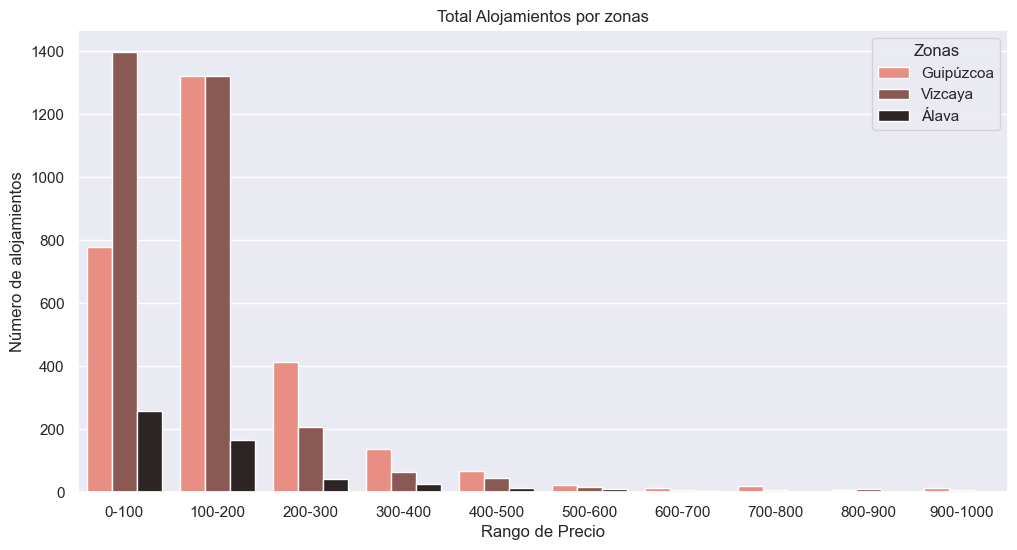

In [116]:
# Creamos una nueva columna llamada 'Rango_precio'
listing['Rango_precio']= pd.cut(listing['Precio'], bins=[0,100,200,300,400,500,600,700,800,900,1000],labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000'])

# Elaboramos el gráfico
plt.figure(figsize=(12, 6))
grafico1= sns.countplot(data =listing, x='Rango_precio', hue='Zonas', palette='dark:salmon_r') # analisis este me gusta mas y comparamos son el sexo
grafico1.set_xlabel('Rango de Precio')
grafico1.set_ylabel('Número de alojamientos')
plt.title('Total Alojamientos por zonas')

### 5.2 Disponibilidad anual promedio para las 10 localidades más visitadas

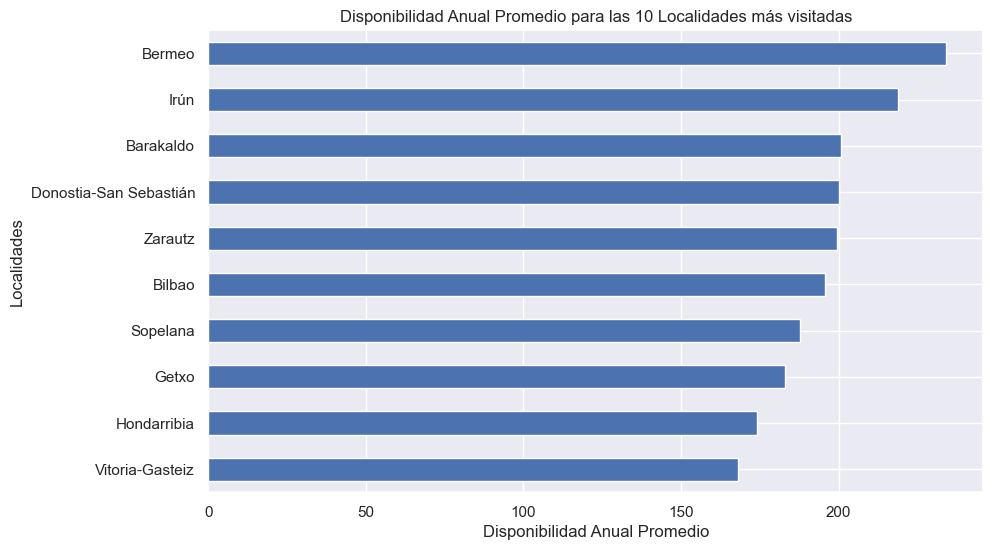

In [117]:
# Creamos un top 10 con localidades más visitadas
top_localidades = listing['Localidades'].value_counts().head(10).index.tolist()
# Agrupamos el top con la disponibilidad anual
disponibilidad_anual_promedio=listing[listing['Localidades'].isin(top_localidades)].groupby('Localidades')['Disponibilidad_anual'].mean()

# Mostramos gráfico
plt.figure(figsize=(10, 6))
disponibilidad_anual_promedio.sort_values().plot(kind='barh')
plt.title('Disponibilidad Anual Promedio para las 10 Localidades más visitadas')
plt.xlabel('Disponibilidad Anual Promedio')
plt.ylabel('Localidades')
plt.grid(True)
plt.show()

### 5.3 Superhost vs no superhost

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Sí')])

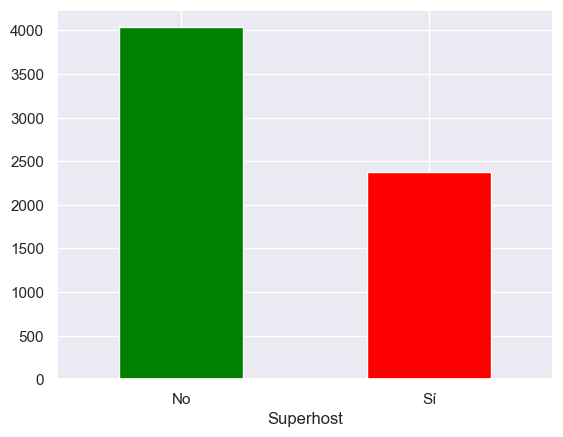

In [118]:
contador_superhost = listing['Superhost'].value_counts()

colores = ['green', 'red']
contador_superhost.plot(kind='bar', stacked=True, color=colores)
plt.xticks(rotation=0)

### 5.4 Zonas con más reseñas

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/1549249074.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




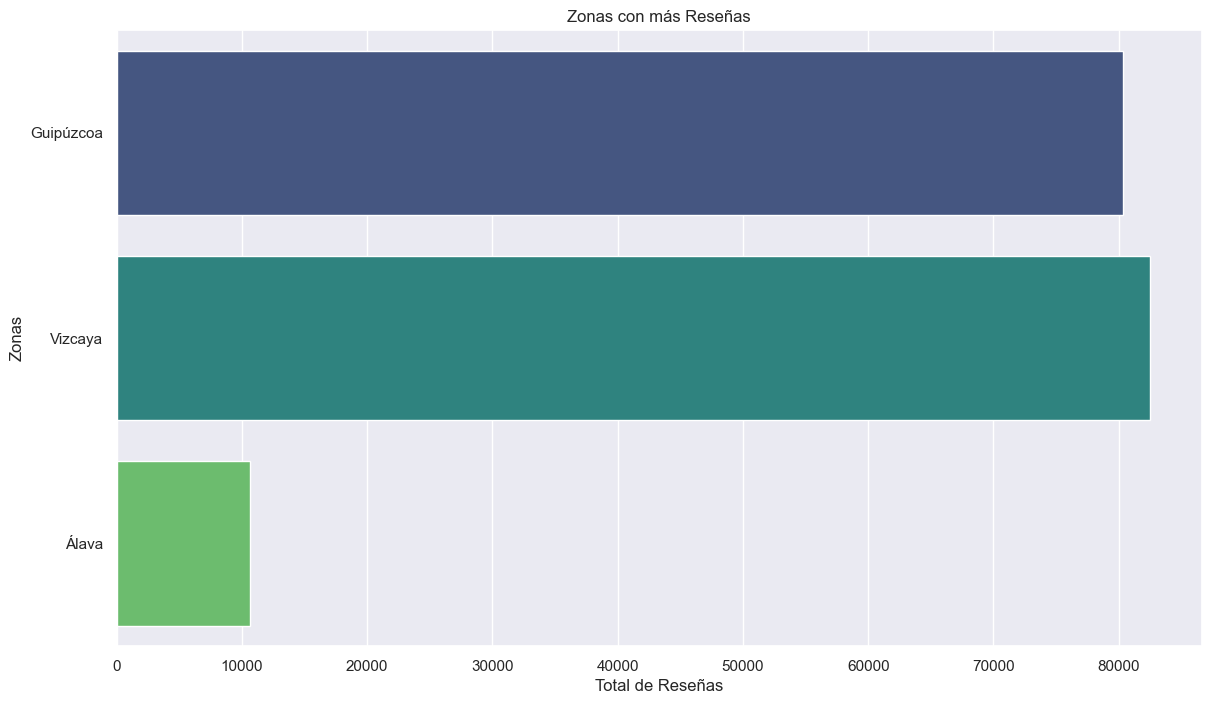

In [119]:
# Agrupamos las zonas con el total de reseñas
localidades_reseñas = listing.groupby('Zonas')['Total_reseñas'].sum().reset_index()
zonas_reseñas = localidades_reseñas.sort_values(by='Total_reseñas', ascending=False)
 
# Mostramos gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x='Total_reseñas', y='Zonas', data=localidades_reseñas, palette='viridis')
plt.title('Zonas con más Reseñas')
plt.xlabel('Total de Reseñas')
plt.ylabel('Zonas')
plt.show()

### 5.5 Distribución de precio por persona y estancia mínima

In [120]:
# Creamos una columna de precio por persona y la calculamos
listing['Precio_persona']= listing['Precio']/listing['Total_huespedes']

# Mostramos gráfico
filtro_estancia=listing[listing['Mínima_estancia']<=100] # Añadimos un filtro para que mínima estancia no supere 100
px.scatter(filtro_estancia, x='Mínima_estancia', y='Precio_persona')

### 5.6 Distribución de precio por zonas

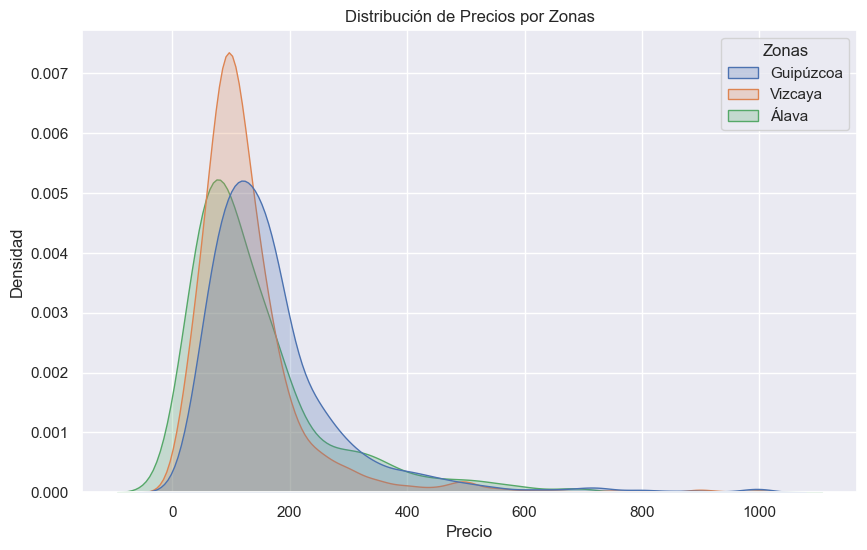

In [121]:
precio_filtrado = listing[listing['Precio'] <= 1000] # Filtramos el precio para que no supere 1000

# Graficamos la distribución de precios por zonas usando Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=precio_filtrado, x='Precio', hue='Zonas', fill=True, common_norm=False)
plt.title('Distribución de Precios por Zonas')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

### 5.7 Distribución de precio por Superhost

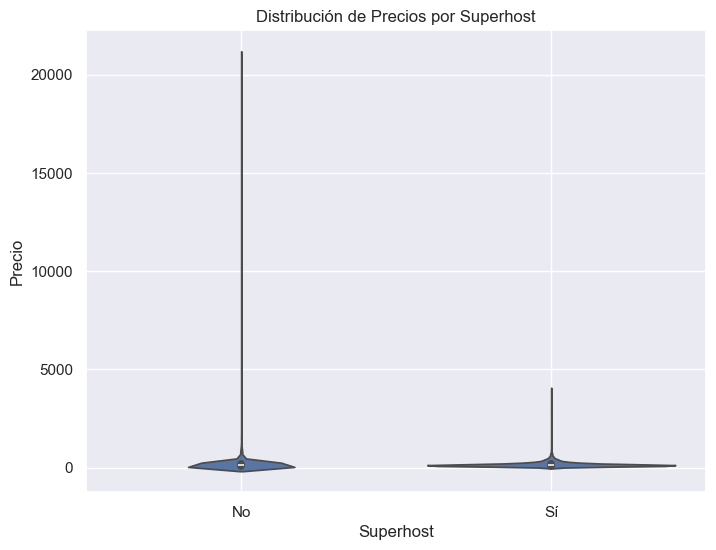

In [122]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Superhost', y='Precio', data=listing)
plt.title('Distribución de Precios por Superhost')
plt.xlabel('Superhost')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

### 5.8 Disponibilidad anual vs Precio

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/2503690127.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



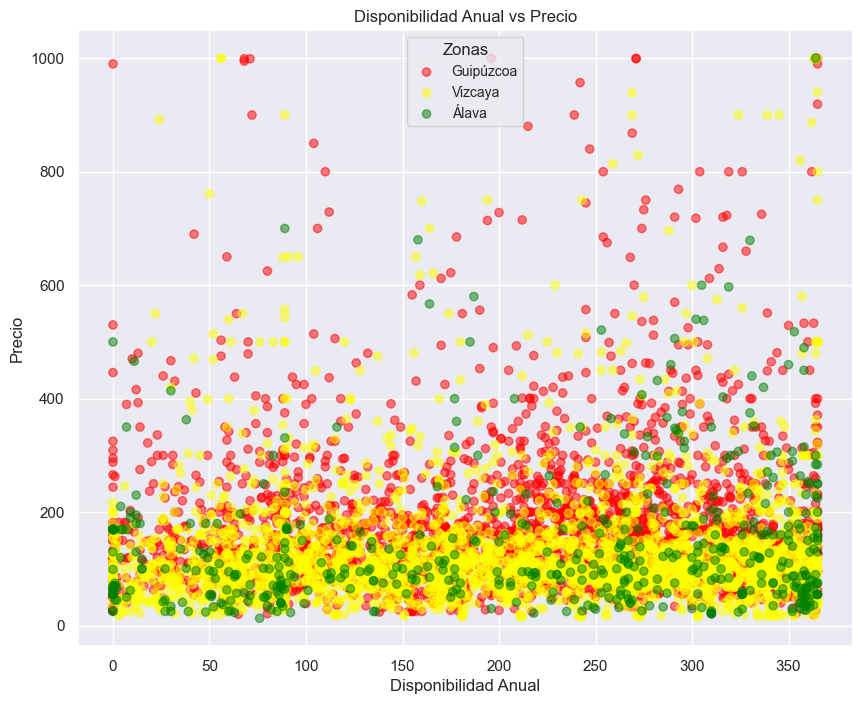

In [123]:
filtrado = listing[listing['Precio'] <= 1000] # Filtramos el precio para que no supere 1000

# Definimos los colores para cada zona
Zonas = filtrado['Zonas'].unique()
color_list = ['red', 'yellow', 'green']
color_map = {zona: color for zona, color in zip(Zonas, color_list)}

# Asignamos colores a cada punto según la zona
filtrado['Color'] = filtrado['Zonas'].map(color_map)

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 8))
for zona in Zonas:
    subset = filtrado[filtrado['Zonas'] == zona]
    plt.scatter(subset['Disponibilidad_anual'], subset['Precio'], label=zona, c=subset['Color'], alpha=0.5)

plt.title('Disponibilidad Anual vs Precio')
plt.xlabel('Disponibilidad Anual')
plt.ylabel('Precio')
plt.legend(fontsize='small', title='Zonas')
plt.grid(True)
plt.show()

### 5.9 Top 10 Servicios mas comunes

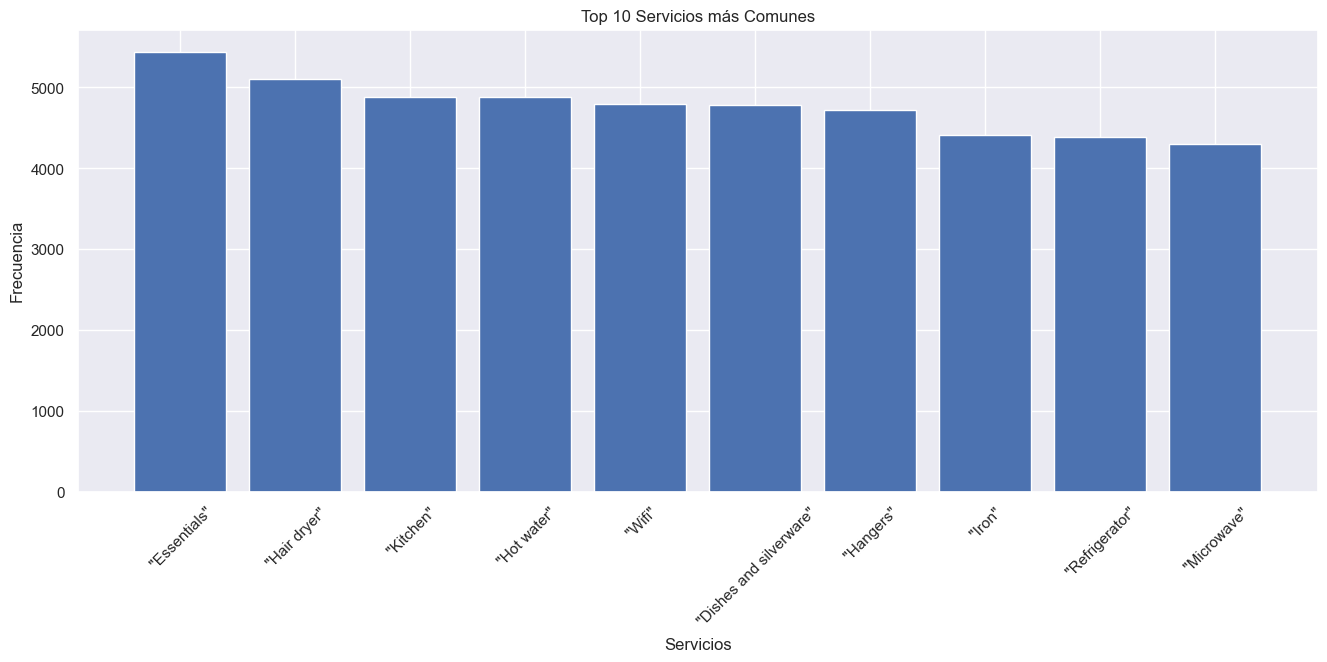

In [124]:
contador_servicios = Counter([service for sublist in listing['Servicios'].str.split(',') for service in sublist])
 
plt.figure(figsize=(16, 6))
contador_servicios.most_common(10)
plt.bar(*zip(*contador_servicios.most_common(10)))
plt.title('Top 10 Servicios más Comunes')
plt.xlabel('Servicios')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<hr color="white">

## 6. Mapas

### 6.1 Mapa de calor de Precio por Localización 

In [125]:
import folium
from folium.plugins import HeatMap
 
# Creamos un mapa respecto a longitud y latitud
map = folium.Map(location=[listing['Latitud'].mean(), listing['Longitud'].mean()], zoom_start=9.5)
 
# Convertimos los datos a formato (lat, lon, precio)
heat_data = listing[['Latitud', 'Longitud', 'Precio']].groupby(['Latitud', 'Longitud']).mean().reset_index().values.tolist()
 
HeatMap(heat_data).add_to(map)
map

### 6.2 Mapa de Ubicaciones de Propiedades

In [126]:
lats2024 = listing['Latitud'].tolist()
lons2024 = listing['Longitud'].tolist()
locations = list(zip(lats2024, lons2024))

mapa = folium.Map(location=[42.7500, -2.3990], zoom_start=9.48)
FastMarkerCluster(data=locations).add_to(mapa)
mapa

<hr color="green">

## 7. Seguridad

### 7.1 Potenciales hoteles ilegales

In [127]:
# Filtramos los datos para habitaciones privadas
private = listing[listing['Tipo_propiedad'] == 'Private room']

# Agrupamos por host_id y Zonas, y contamos el número de habitaciones privadas
host_private = private.groupby(['host_id', 'Anfitrión', 'Zonas']).size().reset_index(name='Habitaciones_privadas')
host_private = host_private.sort_values(by='Habitaciones_privadas', ascending=False)

host_private.head()


,host_id,Anfitrión,Zonas,Habitaciones_privadas
5,87648325,Fernando,Vizcaya,2
0,2290498,Mari,Álava,1
1,3952766,Jon,Guipúzcoa,1
2,44529361,Lodging House In The Center,Álava,1
3,45371662,Guesthouse,Álava,1


/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/2458817378.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




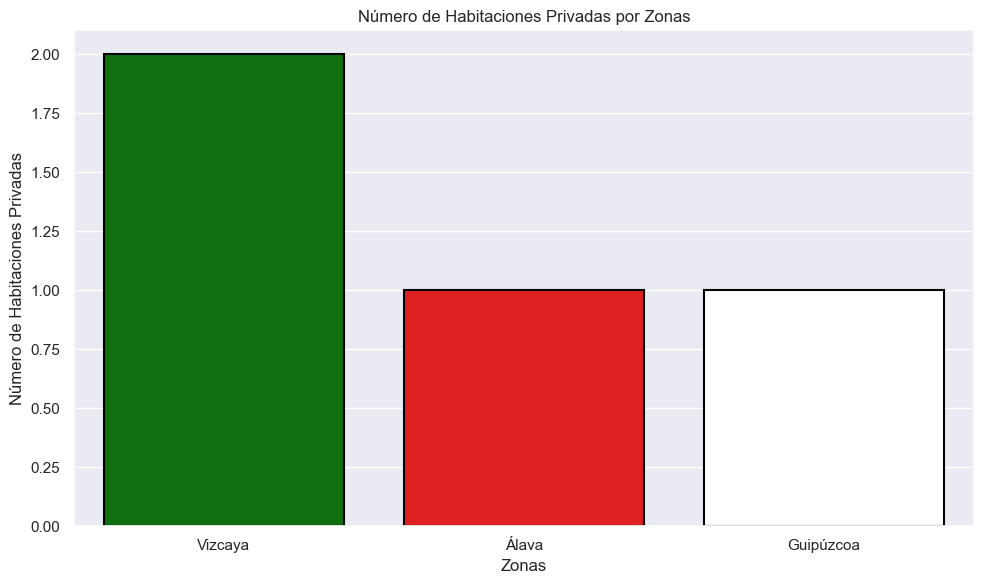

In [128]:
colores = {'Guipúzcoa': 'WHITE', 'Vizcaya': 'green', 'Álava': 'red'}

# Graficar el número de habitaciones privadas por zona con colores específicos

plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')
barplot=sns.barplot(x='Zonas', y='Habitaciones_privadas', data=host_private, palette=colores)

# Agregar bordes oscuros a las barras
for bar in barplot.patches:
    bar.set_edgecolor('black')  # Establecer el color del borde
    bar.set_linewidth(1.5)    
plt.title('Número de Habitaciones Privadas por Zonas')
plt.xlabel('Zonas')
plt.ylabel('Número de Habitaciones Privadas')
plt.tight_layout()
plt.show()

<hr color="red">

## 8. Puntuaciones y reseñas

### 8.1 Puntuaciones de las opiniones

In [129]:
# Renombramos las valoraciones para un uso más legible
listing.rename({'review_scores_location':'Localización','review_scores_cleanliness':'Limpieza','review_scores_value':'Experiencia_General','review_scores_communication':'Comunicación','review_scores_checkin':'Checkin', 'review_scores_accuracy': 'Precisión', 'room_type':'Tipo_habitación'}, axis=1, inplace=True)

In [130]:
# Rellanamos valores NaN con la media
listing['Limpieza'].fillna(listing['Limpieza'].mean(), inplace=True)
listing['Localización'].fillna(listing['Localización'].mean(), inplace=True)
listing['Experiencia_General'].fillna(listing['Experiencia_General'].mean(), inplace=True)
listing['Comunicación'].fillna(listing['Comunicación'].mean(), inplace=True)
listing['Checkin'].fillna(listing['Checkin'].mean(), inplace=True)
listing['Precisión'].fillna(listing['Precisión'].mean(), inplace=True)


/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/3320572157.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/3320572157.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

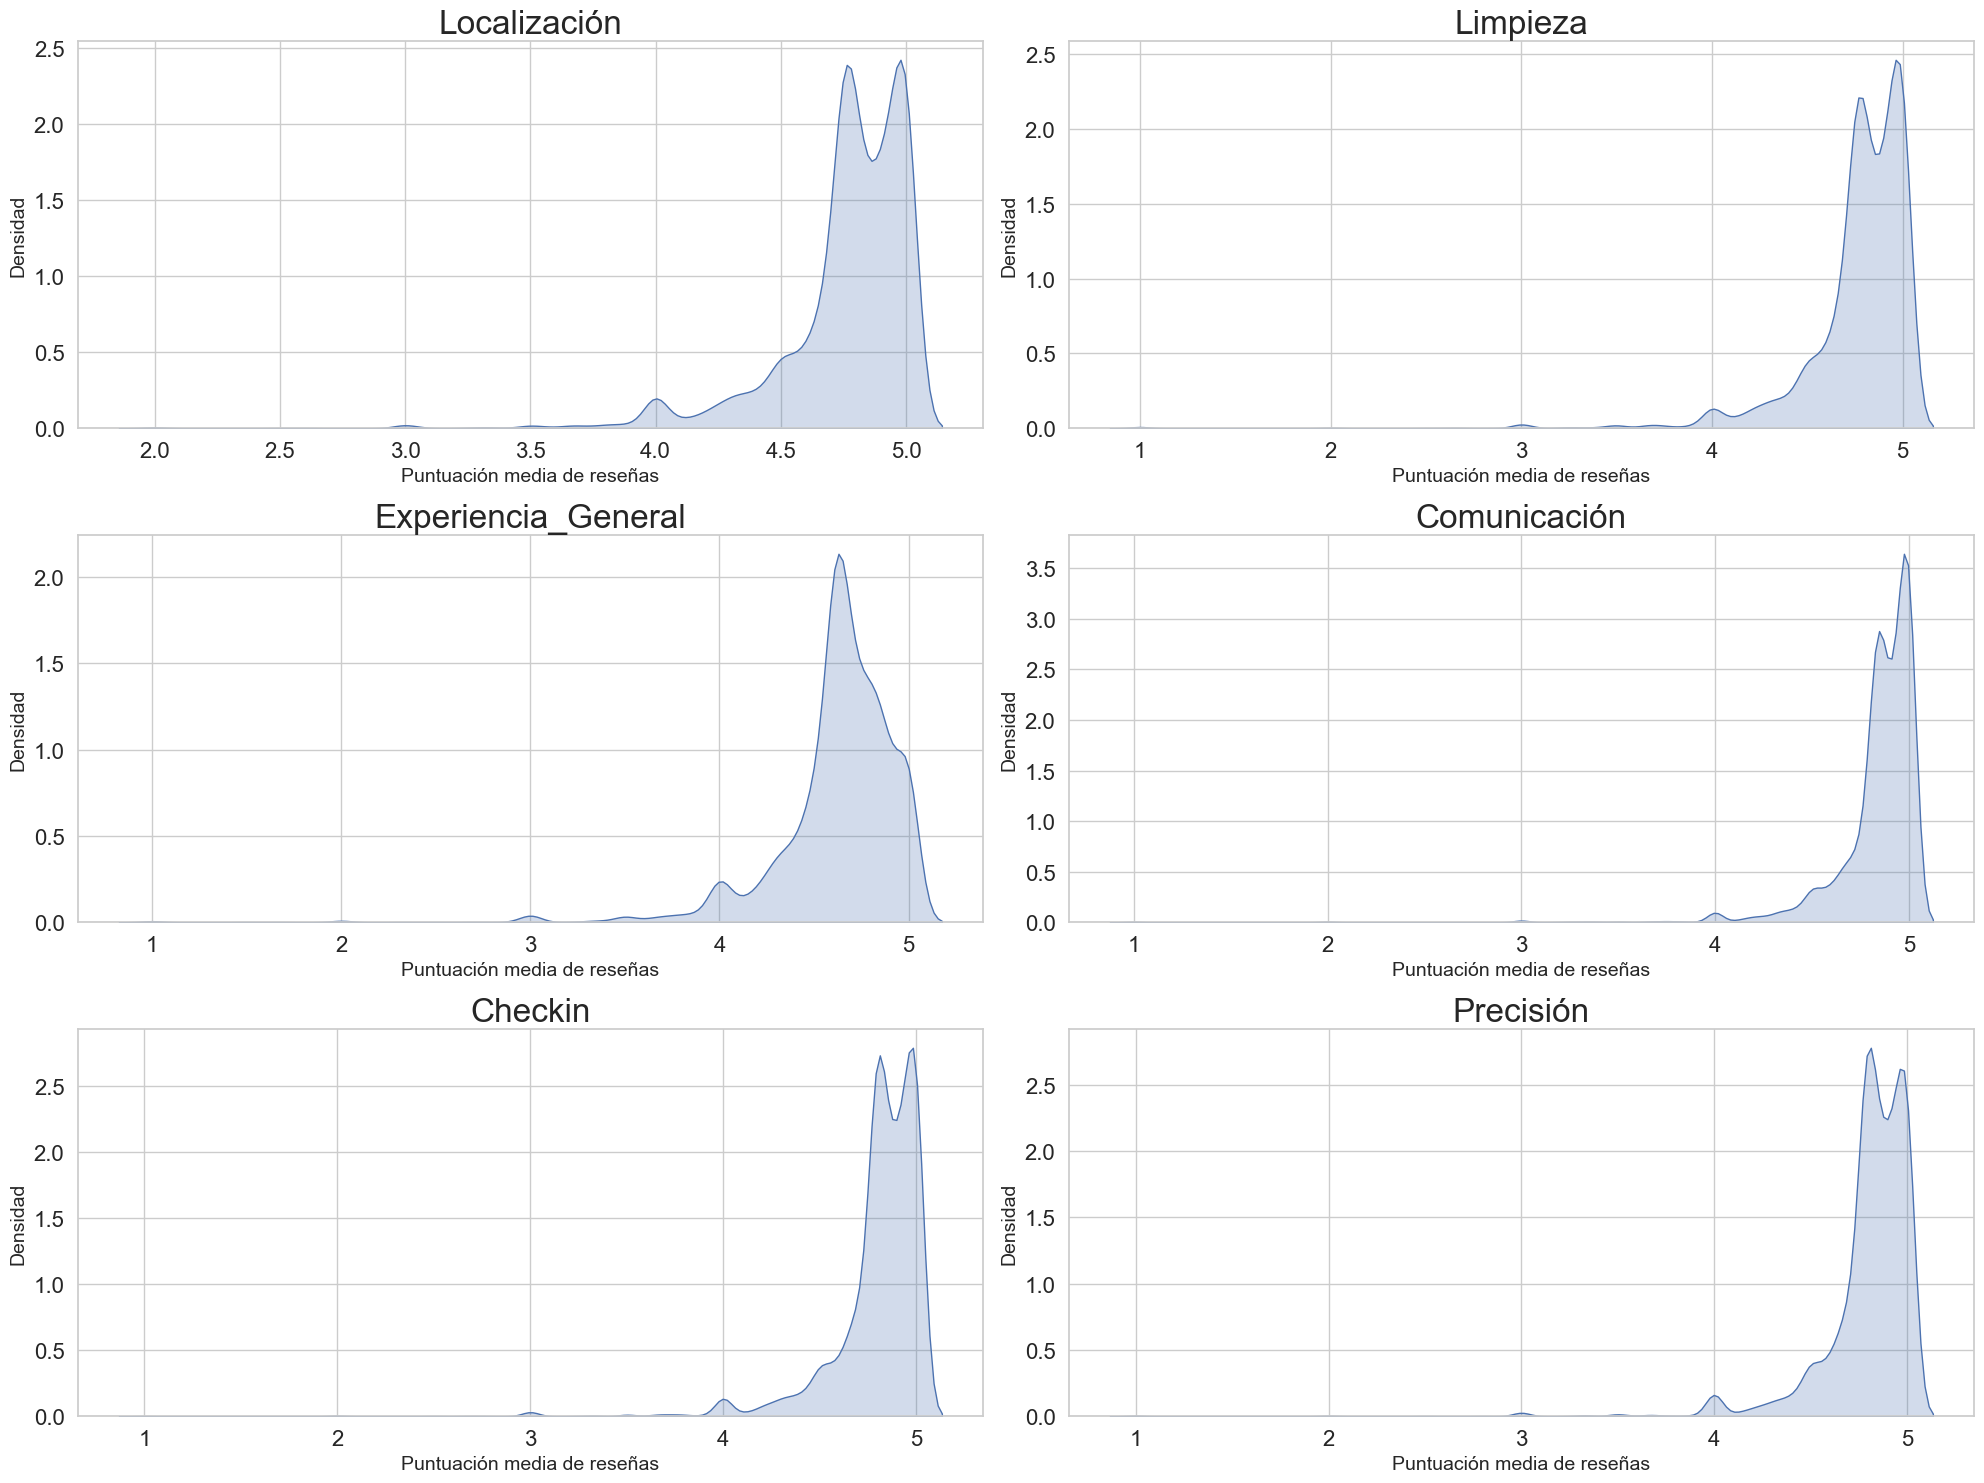

In [131]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

# Localización
ax1 = fig.add_subplot(321)
sns.kdeplot(listing['Localización'], ax=ax1, color='b', fill=True)
ax1.set_title("Localización", fontsize=24)
ax1.set_ylabel('Densidad', fontsize=14)
ax1.set_xlabel('Puntuación media de reseñas', fontsize=14)

# Limpieza
ax2 = fig.add_subplot(322)
sns.kdeplot(listing['Limpieza'], ax=ax2, color='b', fill=True)
ax2.set_title("Limpieza", fontsize=24)
ax2.set_ylabel('Densidad', fontsize=14)
ax2.set_xlabel('Puntuación media de reseñas', fontsize=14)

# Experiencia General
ax3 = fig.add_subplot(323)
sns.kdeplot(listing['Experiencia_General'], ax=ax3, color='b', fill=True)
ax3.set_title("Experiencia_General", fontsize=24)
ax3.set_ylabel('Densidad', fontsize=14)
ax3.set_xlabel('Puntuación media de reseñas', fontsize=14)

# Comunicación
ax4 = fig.add_subplot(324)
sns.kdeplot(listing['Comunicación'], ax=ax4, color='b', fill=True)
ax4.set_title("Comunicación", fontsize=24)
ax4.set_ylabel('Densidad', fontsize=14)
ax4.set_xlabel('Puntuación media de reseñas', fontsize=14)

# Checkin
ax5 = fig.add_subplot(325)
sns.kdeplot(listing['Checkin'], ax=ax5, color='b', fill=True)
ax5.set_title("Checkin", fontsize=24)
ax5.set_ylabel('Densidad', fontsize=14)
ax5.set_xlabel('Puntuación media de reseñas', fontsize=14)

# Precisión
ax6 = fig.add_subplot(326)
sns.kdeplot(listing['Precisión'], ax=ax6, color='b', fill=True)
ax6.set_title("Precisión", fontsize=24)
ax6.set_ylabel('Densidad', fontsize=14)
ax6.set_xlabel('Puntuación media de reseñas', fontsize=14)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


### 8.2 Puntuación Media de Comunicación respecto las 10 propiedades más frecuentadas

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/1392191909.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




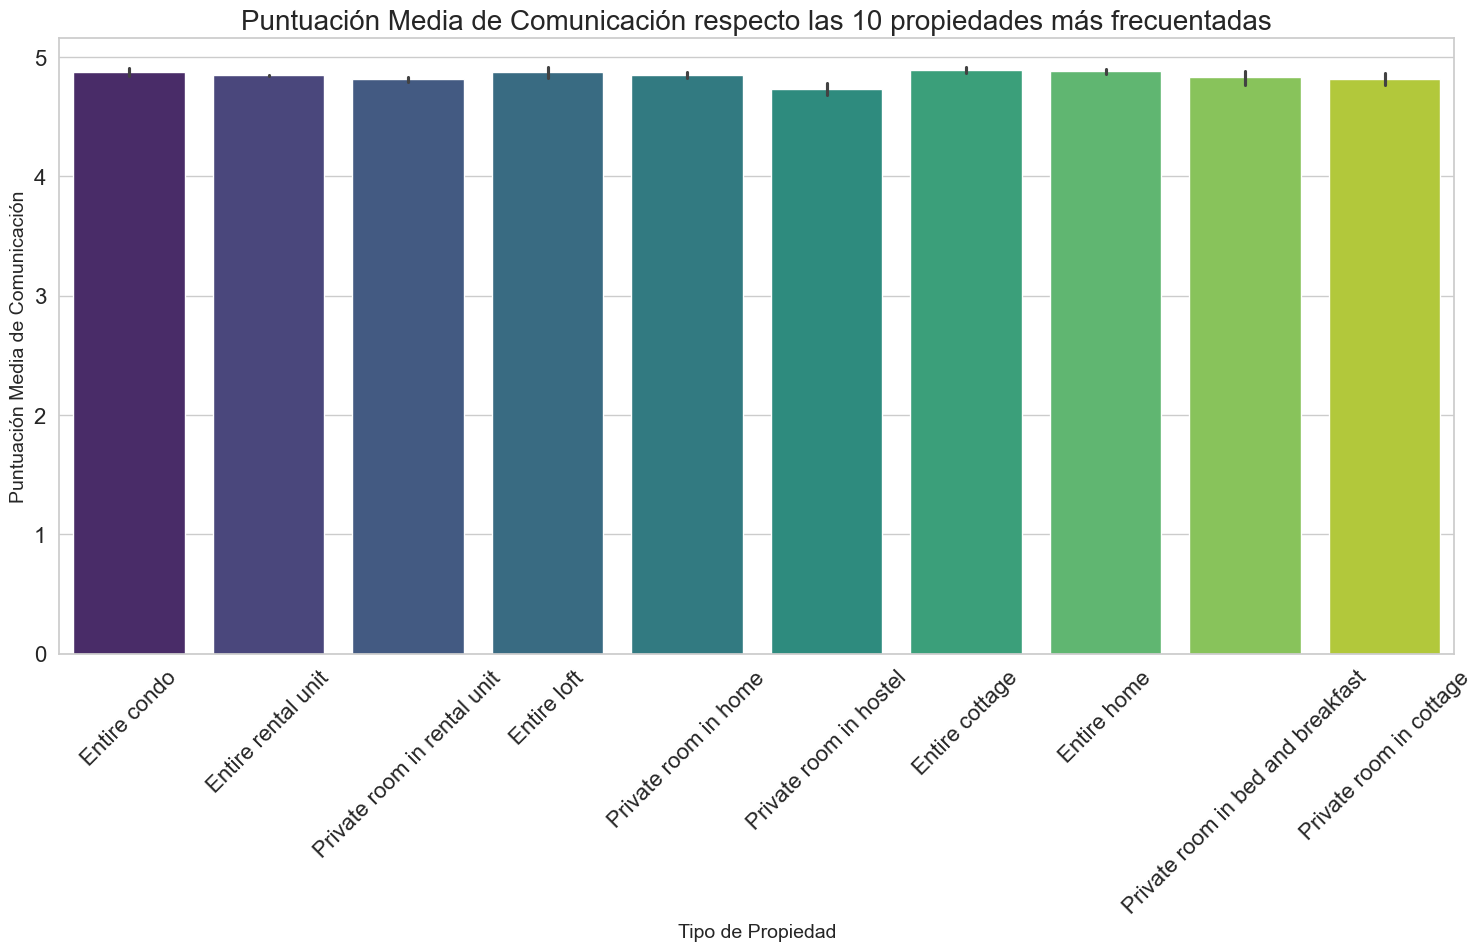

In [132]:
top_10_tipos_propiedades = listing['Tipo_propiedad'].value_counts().head(10).index
 
top_10_listing = listing[listing['Tipo_propiedad'].isin(top_10_tipos_propiedades)]
 
plt.figure(figsize=(18, 8))
sns.barplot(x='Tipo_propiedad', y='Comunicación', data=top_10_listing, estimator=lambda x: x.mean(), palette='viridis')
plt.title('Puntuación Media de Comunicación respecto las 10 propiedades más frecuentadas', fontsize=20)
plt.xlabel('Tipo de Propiedad', fontsize=14)
plt.ylabel('Puntuación Media de Comunicación', fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

### 8.3 Puntuación Media de Limpieza por Localidad

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/3258160728.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




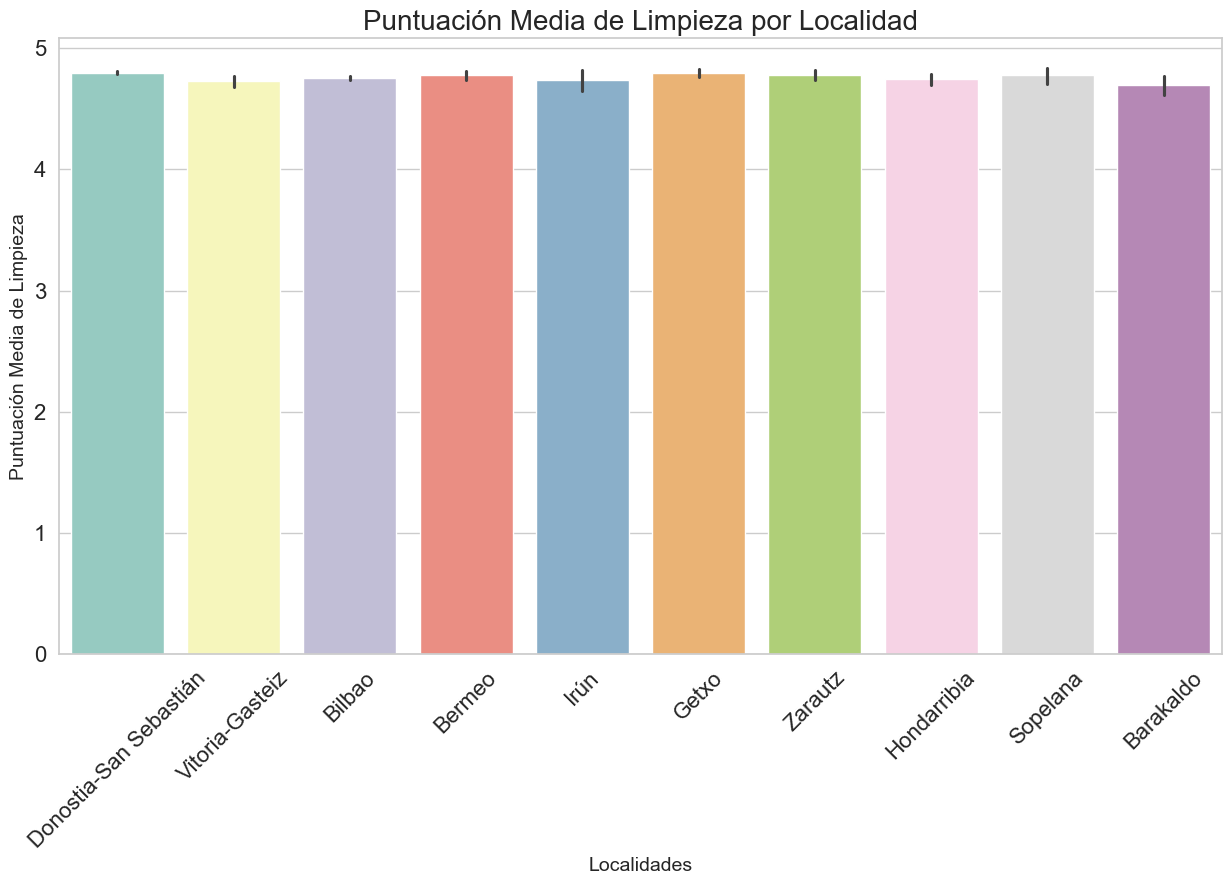

In [133]:
top_10_localidades = listing['Localidades'].value_counts().head(10).index
 
top_10_listing = listing[listing['Localidades'].isin(top_10_localidades)]
 
plt.figure(figsize=(15, 8))
sns.barplot(x='Localidades', y='Limpieza', data=top_10_listing, estimator=lambda x: x.mean(), palette='Set3')
plt.title('Puntuación Media de Limpieza por Localidad', fontsize=20)
plt.xlabel('Localidades', fontsize=14)
plt.ylabel('Puntuación Media de Limpieza', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

### 8.4 Puntuación media de Limpieza por Tipo de habitación

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/1721126982.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




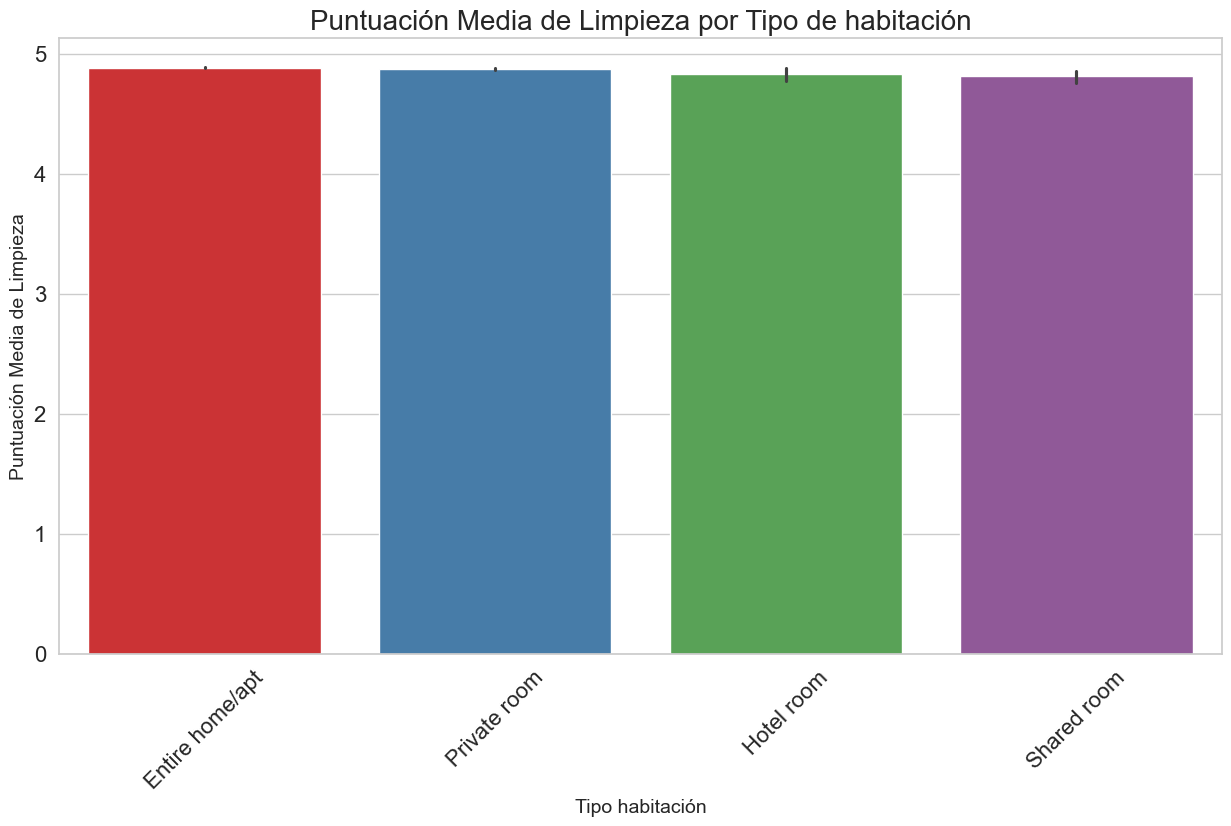

In [134]:
top_10_limpieza = listing['Limpieza'].value_counts().head(10).index
 
top_10_listing = listing[listing['Limpieza'].isin(top_10_limpieza)]
 
plt.figure(figsize=(15, 8))
sns.barplot(x='Tipo_habitación', y='Limpieza', data=top_10_listing, estimator=lambda x: x.mean(), palette='Set1')
plt.title('Puntuación Media de Limpieza por Tipo de habitación', fontsize=20)
plt.xlabel('Tipo habitación', fontsize=14)
plt.ylabel('Puntuación Media de Limpieza', fontsize=14)
plt.xticks(rotation=45)  
plt.show()

### 8.5 Precio medio por Zona

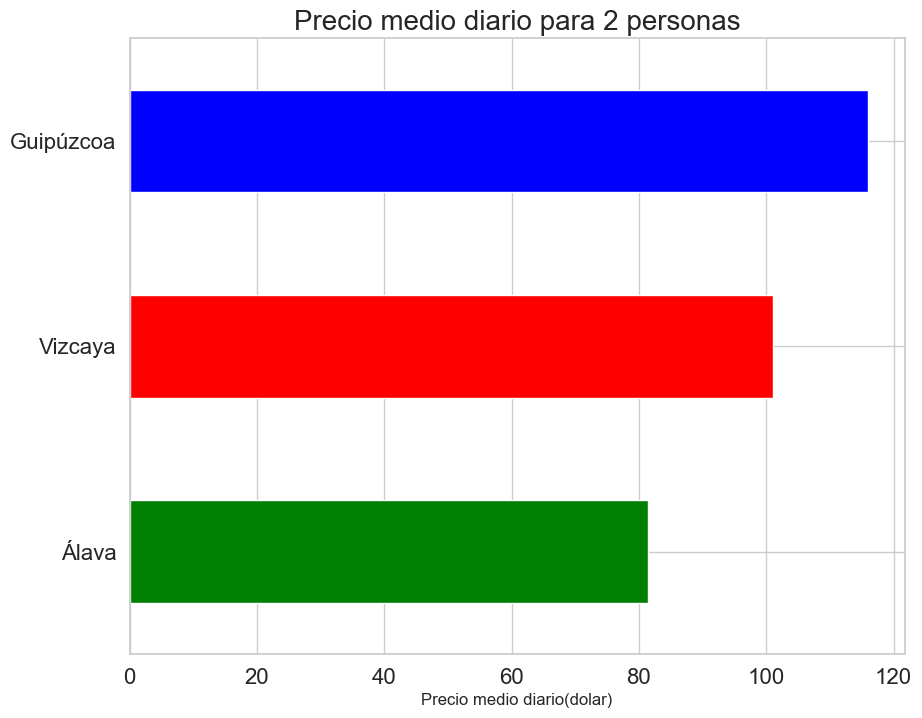

In [135]:

feq = listing[listing['Total_huespedes']==2]
feq = feq.groupby('Zonas')['Precio'].mean().sort_values(ascending=True)

colores = ['green', 'red', 'blue']

feq.plot.barh(figsize=(10,8), color=colores, width=0.5)
plt.title('Precio medio diario para 2 personas', fontsize=20)
plt.xlabel('Precio medio diario(dolar)',fontsize=12)
plt.ylabel('')
plt.show()


### 8.6 Fecha diponibilidad

In [136]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    6424 non-null   int64   
 1   Descripción           6424 non-null   object  
 2   host_id               6424 non-null   int64   
 3   Anfitrión             6424 non-null   object  
 4   Superhost             6416 non-null   object  
 5   Total_anuncios        6424 non-null   int64   
 6   Localidades           6424 non-null   object  
 7   Zonas                 6424 non-null   object  
 8   Latitud               6424 non-null   float64 
 9   Longitud              6424 non-null   float64 
 10  Tipo_propiedad        6424 non-null   object  
 11  Total_huespedes       6424 non-null   int64   
 12  Total_baños           6424 non-null   int64   
 13  Total_dormitorios     6424 non-null   int64   
 14  Servicios             6424 non-null   object  
 15  Prec

In [137]:
# Hacemos media pero no lo vamos autilizar 
remote_work_per_year = calendar.groupby('Fechas')['Precio'].mean().reset_index()

In [138]:
fig = px.line(remote_work_per_year, x='Fechas', y='Precio', title='Precio por fechas',
                template="plotly_dark", color_discrete_sequence=['green'])

fig.show()

### 8.7 Top 10 de Localidades para hospedarse

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/1703197056.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




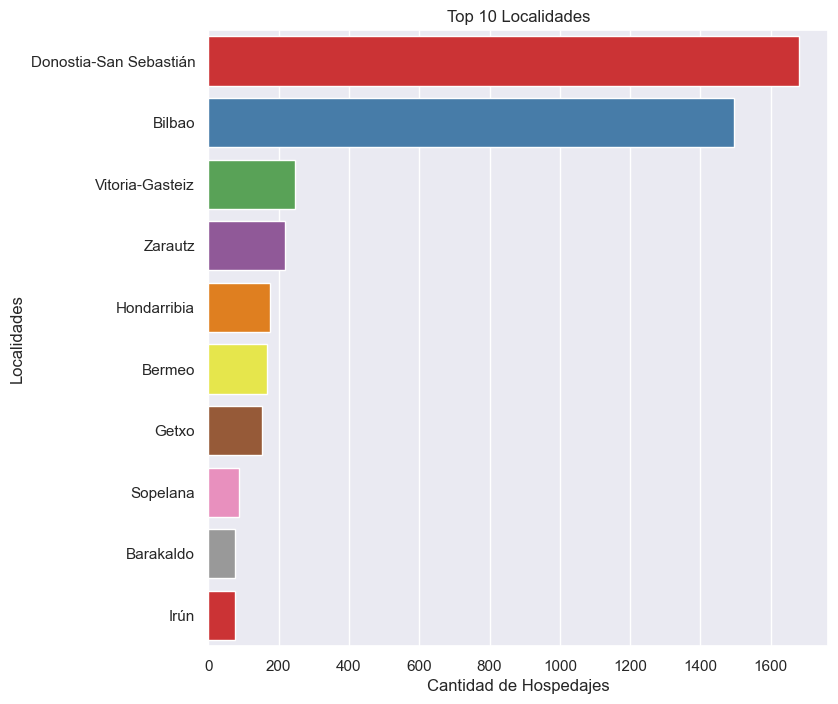

In [139]:
# Obtener las top 10 localidades ordenadas por cantidad de hospedajes
top10_localidades = listing['Localidades'].value_counts().head(10).index.tolist()
 
# Ordenar las top 10 localidades por cantidad de hospedajes en orden descendente
top10_localidades_sorted = listing[listing['Localidades'].isin(top10_localidades)] \
                             .groupby('Localidades').size() \
                             .sort_values(ascending=False).index  # Orden descendente
 
# Generar el gráfico
plt.figure(figsize=(8, 8))
sns.set_theme(style='darkgrid')
 
sns.countplot(data=listing[listing['Localidades'].isin(top10_localidades)],
              y='Localidades',
              order=top10_localidades_sorted,  # Usamos el orden descendente
              palette='Set1')
 
# Añadir título y etiquetas de los ejes
plt.title('Top 10 Localidades')
plt.xlabel('Cantidad de Hospedajes')
plt.ylabel('Localidades')
 
# Mostrar el gráfico
plt.show()

### 8.8 Media de Precio por persona y por Zona

In [140]:
precio_medio_zona_persona = listing.groupby('Zonas')['Precio_persona'].mean().reset_index()

fig = px.bar(precio_medio_zona_persona.sort_values('Precio_persona', ascending=False),
                x='Zonas', y='Precio_persona', title='Media del Precio por persona por cada zona',
                template="plotly_dark", color_discrete_sequence=['cyan'])

fig.show()

<hr color="white">

## 9. Pruebas Estadísticas

### 9.1 Shapiro-Wilk

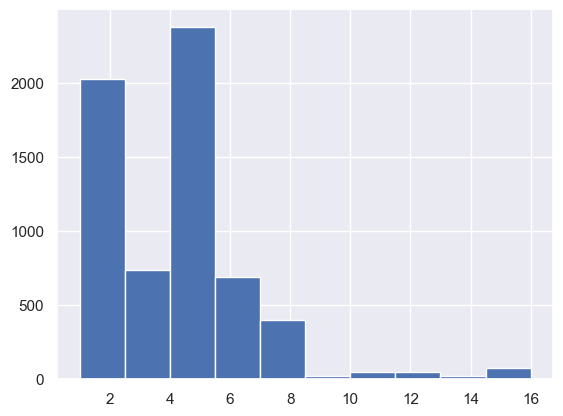

/Users/andresrojo/Desktop/Bootcamp/mi_entorno/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6424.



Estadístico=0.8126984792240446, p-value=1.5442788908310678e-65
La variable Total_huespedes no sigue una distribución normal


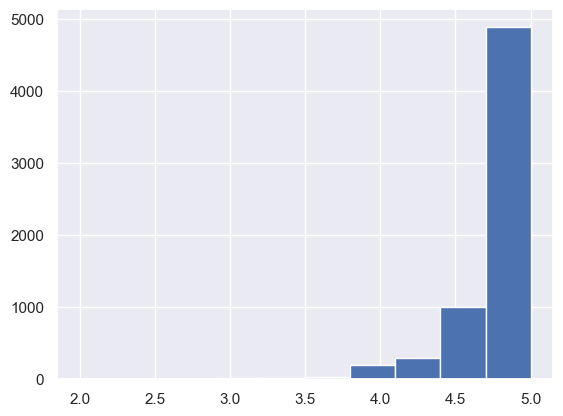

Estadístico=0.7516819279199426, p-value=3.362563685681209e-71
La variable Localización no sigue una distribución normal


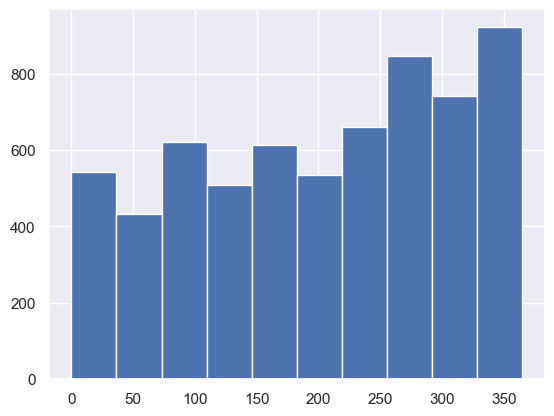

Estadístico=0.9486595572349767, p-value=1.2326387211925445e-42
La variable Disponibilidad_anual no sigue una distribución normal


In [141]:
from scipy.stats import shapiro

for col in ['Total_huespedes', 'Localización', 'Disponibilidad_anual']:
    plt.hist(listing[col])
    #plt.title(color_scale)
    plt.show()
    stat, p = shapiro(listing[col])
    print(f'Estadístico={stat}, p-value={p}')
    if p < 0.05:
        print(f'La variable {col} no sigue una distribución normal')
    else:
        print(f'La variable {col} sigue una distribución normal')

### 9.2 Chi-cuadrado

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_5196/2823524766.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




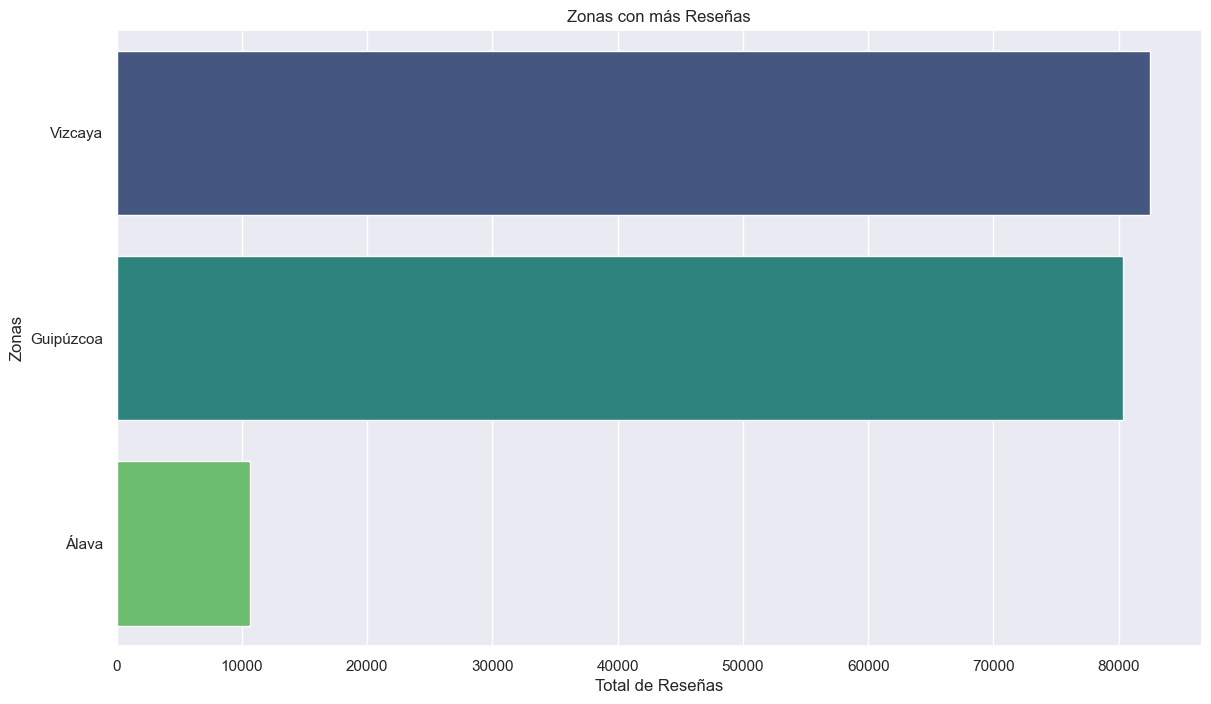

In [142]:
localidades_reseñas = listing.groupby('Zonas')['Total_reseñas'].sum().reset_index()
zonas_reseñas = localidades_reseñas.sort_values(by='Total_reseñas', ascending=False)
 
top_localidades_reseñas = zonas_reseñas.head(10)
plt.figure(figsize=(14, 8))
 
sns.barplot(x='Total_reseñas', y='Zonas', data=top_localidades_reseñas, palette='viridis')
plt.title('Zonas con más Reseñas')
plt.xlabel('Total de Reseñas')
plt.ylabel('Zonas')
plt.show()

In [143]:
import scipy.stats as stats
contingency_table = pd.crosstab(listing['Zonas'], listing['Total_reseñas']) # hacemos tabla de contingencia
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula: Las zonas de Vizcaya y Guipúzcoa son las que tienen más reseñas')
else:
    print('No podemos rechazar la hipótesis nula: Las zonas de Vizcaya y Guipúzcoa son las que tienen más reseñas')

Chi2: 271.7412999530511 P-value: 0.16476190545448993
No podemos rechazar la hipótesis nula: Las zonas de Vizcaya y Guipúzcoa son las que tienen más reseñas


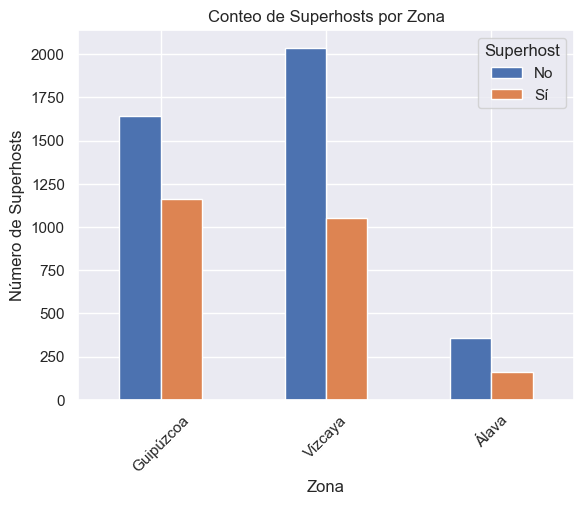

In [144]:
contador_superhost = listing.groupby('Zonas')['Superhost'].value_counts().unstack()
contador_superhost.plot(kind='bar')
 
plt.xticks(rotation=45)
 
plt.xlabel('Zona')
plt.ylabel('Número de Superhosts')
plt.title('Conteo de Superhosts por Zona')
 
plt.show()

In [145]:
import scipy.stats as stats
contingency_table = pd.crosstab(listing['Zonas'], listing['Superhost']) # hacemos tabla de contingencia
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula: Hay más Superhost en Guipúzcoa que en las otras zonas')
else:
    print('No podemos rechazar la hipótesis nula: Hay más Superhost en Guipúzcoa que en las otras zonas')

Chi2: 42.12623083520939 P-value: 7.118773948386667e-10
Rechazamos la hipótesis nula: Hay más Superhost en Guipúzcoa que en las otras zonas


## 9.3 T-Test

### Disponibilidad anual según el valor de limpieza +-4

In [146]:
#Generamos las variables con el valor límite de limpieza
maxlimp= listing[listing['Limpieza']>4]['Disponibilidad_anual']
minlimp= listing[listing['Limpieza']<4]['Disponibilidad_anual']


In [147]:
#importamos la libreria stats para realizar el ttest
import scipy.stats as stats

# comparamos con las variables antes establecidas
t_stats, p_value = stats.ttest_ind(maxlimp, minlimp)
print('T-estadístico:', t_stats, 'P-value:', p_value)
#aceptamos o rechazamos hipótesis según umbral 0.05 p_value
if p_value < 0.05:
    print('Rechazamos la hipótesis nula: La disponibilidad anual según el valor de limpieza +-4')
else:
    print('No podemos rechazar la hipótesis nula: La disponibilidad anual según el valor de limpieza +-4')

T-estadístico: -1.7988679445308262 P-value: 0.07208721899488846
No podemos rechazar la hipótesis nula: La disponibilidad anual según el valor de limpieza +-4


In [148]:
listing.columns

Index(['id', 'Descripción', 'host_id', 'Anfitrión', 'Superhost',
       'Total_anuncios', 'Localidades', 'Zonas', 'Latitud', 'Longitud',
       'Tipo_propiedad', 'Total_huespedes', 'Total_baños', 'Total_dormitorios',
       'Servicios', 'Precio', 'Mínima_estancia', 'Disponibilidad_anual',
       'Total_reseñas', 'Localización', 'Limpieza', 'Experiencia_General',
       'Comunicación', 'Checkin', 'Precisión', 'Tipo_habitación',
       'Rango_precio', 'Precio_persona'],
      dtype='object')

## 9.4 Correlación entre las variables

In [150]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    6424 non-null   int64   
 1   Descripción           6424 non-null   object  
 2   host_id               6424 non-null   int64   
 3   Anfitrión             6424 non-null   object  
 4   Superhost             6416 non-null   object  
 5   Total_anuncios        6424 non-null   int64   
 6   Localidades           6424 non-null   object  
 7   Zonas                 6424 non-null   object  
 8   Latitud               6424 non-null   float64 
 9   Longitud              6424 non-null   float64 
 10  Tipo_propiedad        6424 non-null   object  
 11  Total_huespedes       6424 non-null   int64   
 12  Total_baños           6424 non-null   int64   
 13  Total_dormitorios     6424 non-null   int64   
 14  Servicios             6424 non-null   object  
 15  Prec

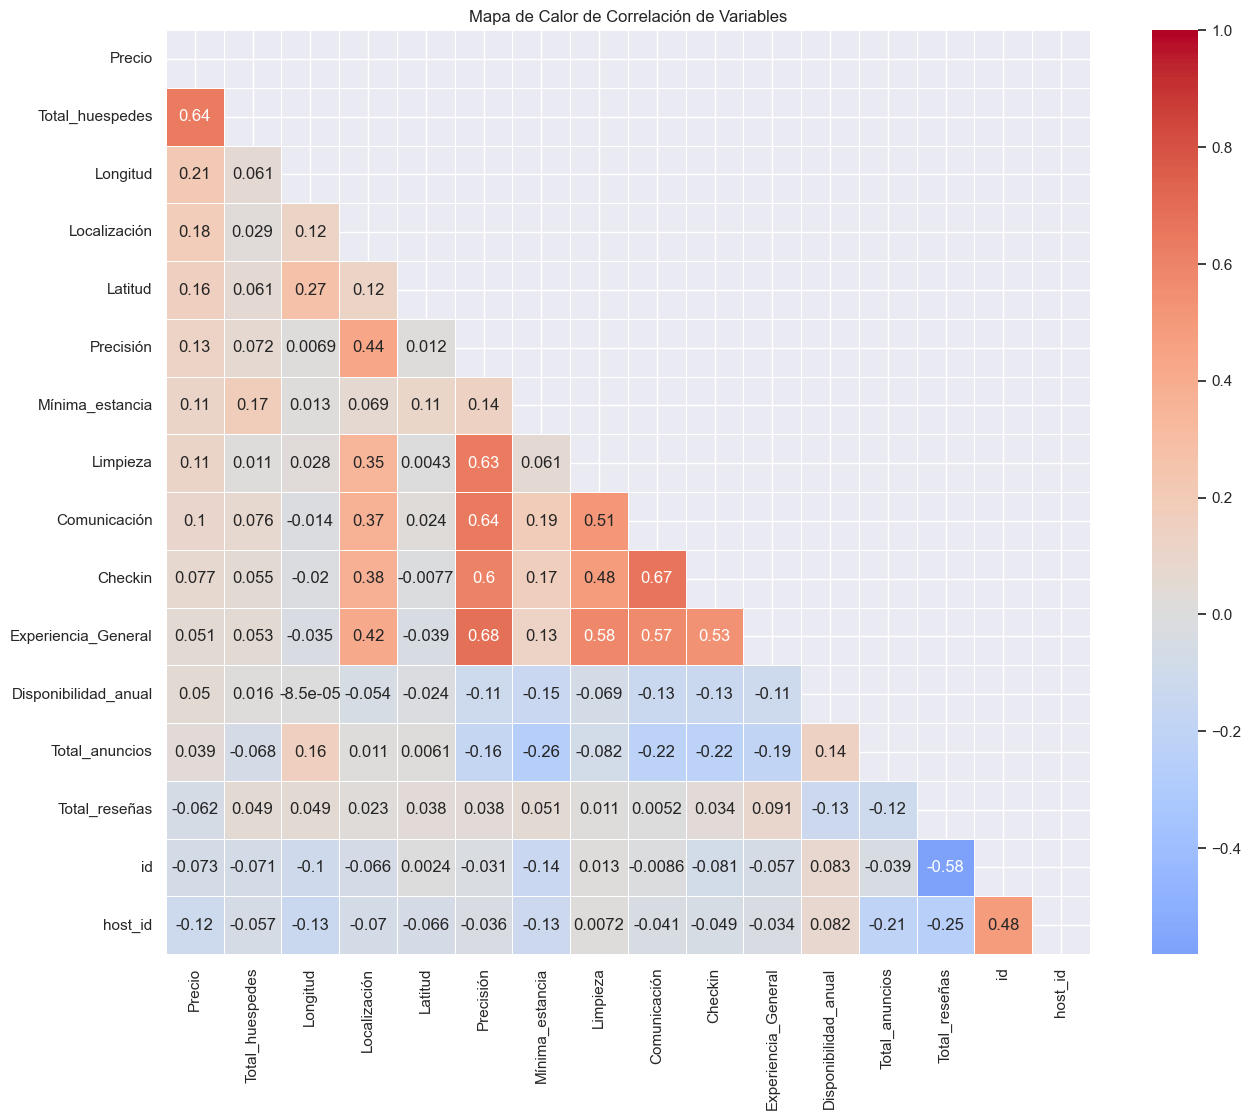

In [156]:
var_corr = ['id', 'host_id',
             'Total_anuncios', 'Latitud', 'Longitud',
              'Total_huespedes',  'Precio',
             'Mínima_estancia', 'Disponibilidad_anual', 'Total_reseñas',
             'Localización', 'Limpieza',
             'Experiencia_General', 'Comunicación', 'Checkin',
             'Precisión']
 
# Filtrar el DataFrame para incluir solo las variables especificadas
listing_filtered = listing[var_corr]

# Calcular la matriz de correlación de Spearman, ya que no sigue una distribución normal
correlation_matrix = listing_filtered.corr(method='spearman').sort_values(by='Precio', axis=0, ascending=False).sort_values(by='Precio', axis=1, ascending=False)
# generamos la mascara de la mitad diagonal del gráfico hacia arriba 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el mapa de calor usando seaborn

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',vmax=1,center=0, square=True)
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

## 10. Vamos a poner una imagen de review words que queda muy bonito


In [157]:
reviews = pd.read_csv("reviews.csv")

In [158]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,985201,3989995,2013-04-01,3123569,Alvaro,Un sitio fantástico para una pareja! \r<br/>Mu...
1,985201,4132626,2013-04-12,5772353,Uwe,Thanks a lot for our wonderful flat in your fl...
2,132068,297597,2011-06-04,182987,Irina,"Mikel's place was outrageous, a perfect combin..."
3,132068,12519461,2014-05-04,5175212,Philippine & Grégoire,Mikel appartment is exactly as it is described...
4,985201,4441167,2013-05-05,82080,Jarrold,Thank you Mikel and Yolanda for such a fantast...
...,...,...,...,...,...,...
291218,1111760382347645374,1114375816135878729,2024-03-17,480951158,Анастасия,"Очень приятная хозяйка, встретила раньше полож..."
291219,1112336876906263873,1124518769959985002,2024-03-31,151918561,Soraya,Nuestra estancia no ha podido ser mejor. El al...
291220,1112913942572508015,1119494012486103016,2024-03-24,18818344,Aaron,This apartment in Portugalete was exactly what...
291221,1116152926506181888,1119452331951610825,2024-03-24,6390088,Rozenn,Joana et son ami Marcos sont très gentils et d...


In [159]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291223 entries, 0 to 291222
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     291223 non-null  int64 
 1   id             291223 non-null  int64 
 2   date           291223 non-null  object
 3   reviewer_id    291223 non-null  int64 
 4   reviewer_name  291223 non-null  object
 5   comments       291206 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.3+ MB


## 10.1 Importamos librerias necesarias

In [160]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [161]:
# añadimos certificado ssl para los mac
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [162]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andresrojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 10.2 Realizamos un poco de preprocesamiento en el csv para conseguir palabras clave

In [163]:
#quitamos los valores vacios
reviews_details = reviews[reviews['comments'].notnull()]
#quitamos los números
reviews['comments'] = reviews['comments'].str.replace('\d+', '') 
#alos pasamos en minúsculas
reviews['comments'] = reviews['comments'].str.lower()
#seguimos preprocesando
reviews['comments'] = reviews['comments'].str.replace('\r\n', "")
#remove stopwords
stop_spanish = stopwords.words("spanish")
reviews['comments'] = reviews['comments'].astype(str).fillna('')
reviews['comments'] = reviews['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_spanish)]))
# quitamos símbolos
reviews['comments'] = reviews['comments'].str.replace('[^\w\s]'," ")
# eliminamos espacios
reviews['comments'] = reviews['comments'].str.replace('\s+', ' ')

reviews.comments.values[2] #print same comments again

"mikel's place was outrageous, perfect combination of quaint seaside charm, central location, comfort, and humility. located at the fisherman port (just west of concha beach) on lovely quiet street, i was steps away from the beach and city center. yet quick retreat to the apartment gives you the sense you are in tiny seaside village looking out to the sea. mikel's apartment is clean and well-stocked. his terrace is amazing. and mikel is an absolute love - leaving with maps and suggestions for hidden gems, must-eats, hikes, etc that transformed touristic experience into an unforgettable one!"

In [164]:
texts = reviews.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
51,the,286203
55,and,249705
104,to,143967
3,br,141440
46,in,112289
61,was,108374
115,is,107265
48,we,82710
149,very,78619
78,of,69439


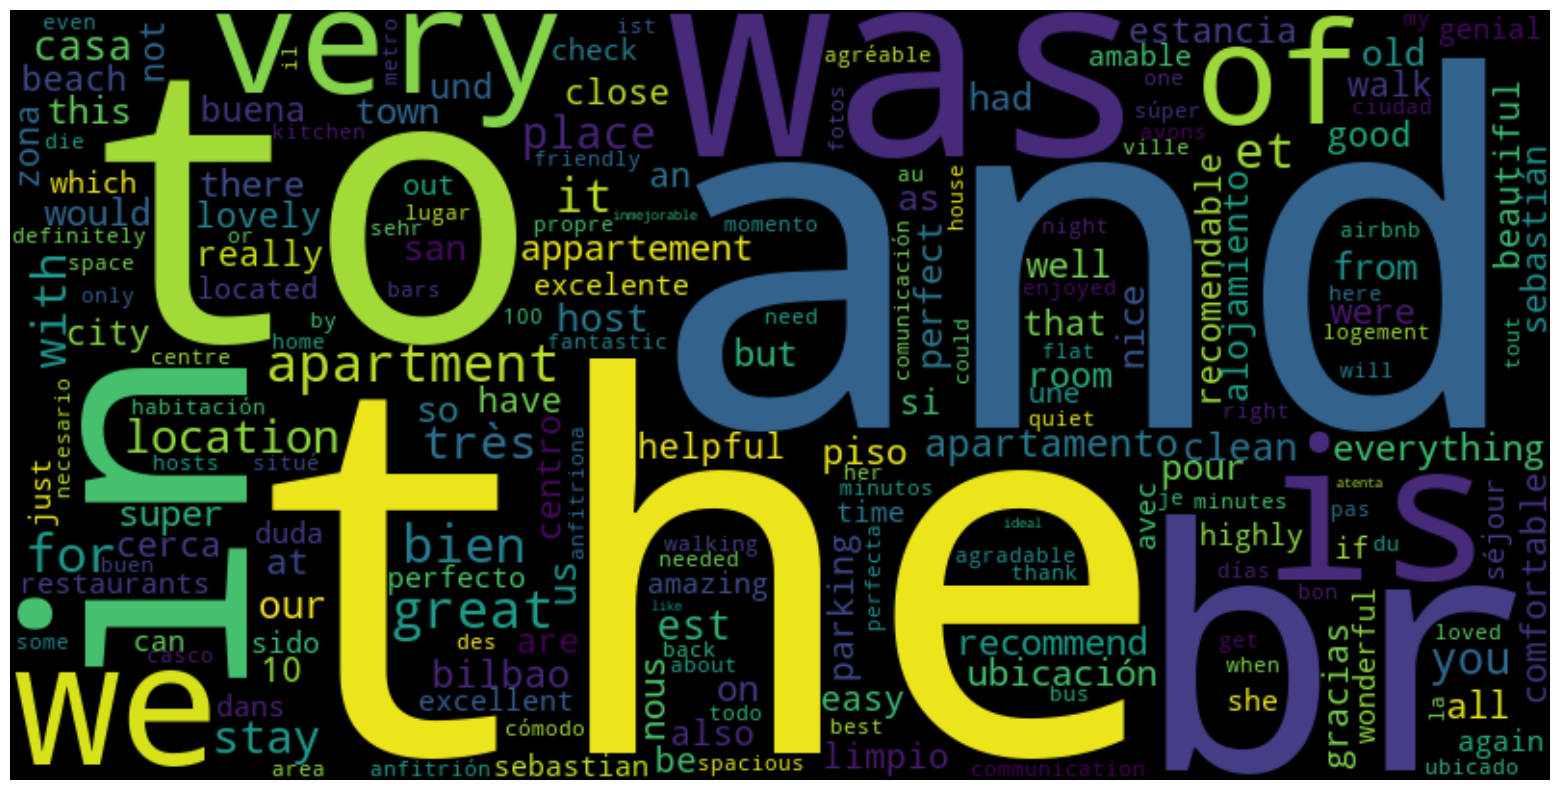

In [165]:
#Generamos la imagen con las palabras clave
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 11. Hacemos copias de los csv para trabajar con PowerBi

In [166]:
# Se ha puesto entre comillas para que no se generen copias innecesarias 
listingc=listing.copy()
calendarc=calendar.copy()
neighbourhoodsc=neighbourhoods.copy()

In [167]:
listingc.to_csv('listingbpi.csv')
calendarc.to_csv('calendarpbi.csv')
neighbourhoodsc.to_csv('neirbourhoodspbi.csv')